In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# Dataset Preparation

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [4]:
x_train.shape

(60000, 28, 28)

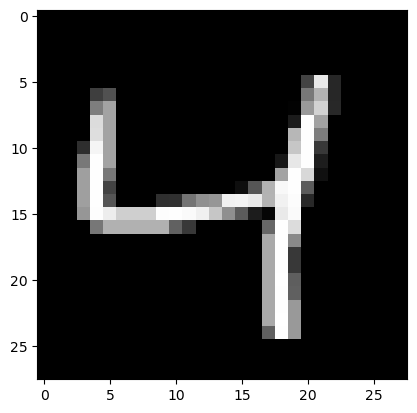

In [5]:
plt.imshow(x_train[2], cmap='gray')

In [6]:
y_train[2]

4

In [7]:
# Data Normalization: Scale the pixel values (0-255) to the range [0, 1] by dividing by 255.
x_train, x_test = x_train / 255.0, x_test / 255.0

# Data Preprocessing

In [9]:
# Reshape Input Data
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

In [10]:
x_train.shape

(60000, 784)

# Model Building

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Compile the Model

In [14]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Train the Model

In [16]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test), 
                    batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8168 - loss: 0.7122 - val_accuracy: 0.9168 - val_loss: 0.3038
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9144 - loss: 0.3090 - val_accuracy: 0.9216 - val_loss: 0.2806
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9215 - loss: 0.2796 - val_accuracy: 0.9244 - val_loss: 0.2724
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9221 - loss: 0.2739 - val_accuracy: 0.9252 - val_loss: 0.2693
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9265 - loss: 0.2679 - val_accuracy: 0.9258 - val_loss: 0.2704
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9275 - loss: 0.2630 - val_accuracy: 0.9269 - val_loss: 0.2627
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9285 - loss: 0.2548 - val_accuracy: 0.9276 - val_loss: 0.2639
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9275 - loss: 0.2621 - 

# Evaluate the Model

In [18]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [19]:
y_pred

array([[3.0552230e-03, 1.9670379e-08, 1.5390612e-02, ..., 9.9989569e-01,
        9.0789057e-02, 7.2891688e-01],
       [3.0618513e-01, 4.9381731e-03, 9.9960405e-01, ..., 4.5692290e-15,
        1.4513749e-01, 3.0809383e-12],
       [1.2673413e-04, 9.9288702e-01, 6.4655721e-01, ..., 4.8067208e-02,
        3.3484423e-01, 3.2192931e-02],
       ...,
       [7.1803044e-07, 4.2956842e-07, 6.1436975e-04, ..., 2.4729469e-01,
        6.2845969e-01, 8.2675242e-01],
       [1.0200478e-05, 2.6750651e-05, 1.6794553e-05, ..., 1.9577854e-05,
        6.0671759e-01, 1.8121002e-05],
       [7.6187815e-04, 1.8797701e-11, 1.1694458e-01, ..., 1.1764563e-10,
        7.0804970e-05, 2.0112244e-08]], dtype=float32)

In [20]:
np.argmax(y_pred[1])

2

In [21]:
y_pred = [np.argmax(i) for i in y_pred]
y_pred[:5]

[7, 2, 1, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    1,    2,    1,    7,   10,    4,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,    8,  916,   15,    9,    6,   14,   13,   45,    3],
       [   2,    0,   16,  916,    0,   28,    4,   13,   23,    8],
       [   1,    1,    3,    2,  916,    0,   11,    4,   10,   34],
       [   7,    3,    1,   23,   10,  784,   17,    9,   31,    7],
       [   7,    3,    5,    1,    7,   11,  919,    2,    3,    0],
       [   1,    6,   19,    6,    6,    1,    0,  957,    3,   29],
       [   6,    6,    4,   18,    9,   18,   10,   12,  883,    8],
       [  10,    7,    1,    8,   28,    5,    0,   24,    7,  919]])>

Text(50.722222222222214, 0.5, 'Truth')

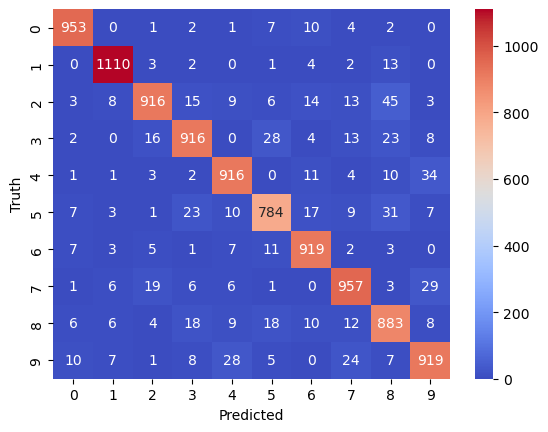

In [23]:
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9167 - loss: 0.2964
Test loss: 0.26362040638923645
Test accuracy: 0.927299976348877
